<a href="https://colab.research.google.com/github/CalebaR/MAT-421/blob/main/ModuleA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**9.1: Base-N and Binary**\
In everyday life we use the base 10 decimal system with digits 0-9\
Computers use binary which is the base 2 decimal system with digits 0 and 1

In [4]:
#Decimal expansion of 950.1
950.1 == 9*(10**2) + 5*(10**1) + 0*(10**0) + 1*(10**-1)

True

In [6]:
#Base 6 to decimal. 3514 (base 6) to decimal (base 10)
3*(6**3) + 5*(6**2) + 1*(6**1) + 4*(6**0)

838

In [9]:
#Base 10 to binary. 53 (base 10) to binary.
#53 is 32 + 16 + 4 +1 = 1*2**5 + 1*2**4 + 0*2**3 + 1*2**2 + 0*2**1 + 1*2**0 = 53
# So 53 in binary is 110101
#check using bin() function
bin(53) #0b prefix represents binary number to help differentiate between base 10

'0b110101'

In [11]:
#Binary to base 10. 10111 (binary) to base 10
1*2**4 + 0*2**3 + 1*2**2 + 1*2**1 + 1*2**0

23

In [13]:
#use int() funtion to convert binary to decimal
int(0b10111)

23

In [9]:
#addition in binary. adding 105 and 45 in binary
a = bin(105)
b = bin(45)
print("",a , "\n+",b)
print("=", )
print(bin(0b1101001 + 0b101101)) # binary numbers can be added the same way as decimal numbers
int(0b10010110)

 0b1101001 
+ 0b101101
=
0b10010110


150

In [11]:
#multiplication in binary. multiplying 105 and 45 in binary
a = bin(105)
b = bin(45)
print("",a , "\n*",b)
print("=", )
print(bin(0b1101001 * 0b101101)) # binary numbers can be multiplied the same way as decimal numbers
int(0b1001001110101)

 0b1101001 
* 0b101101
=
0b1001001110101


4725

**9.2: Floating Point Numbers**\
A float in Python is double precision meaning it can hold 64 bits. 1 bit for sign, 11 bits for exponent and 52 bits for fraction

In [16]:
import sys
sys.float_info


sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

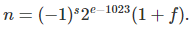\
formula for representing float

In [ ]:
#converting IEEE754 number to base 10 number


n=(−1)**s*(2**(e−1023))*(1+f) #formula for representing float

**9.3: Round-off Errors**